Jason Ha HW 10 3/30/22

Problem 2
Let’s practice some debugging. Go to this link: 
https://colab.research.google.com/drive/1lGjSv4inSuYzoo9lewXvy0KH7XLvris5?usp=sh
aring and copy the code you see in your hw10 juputer notebook. The code has bugs! 
Use what we learned in class to debug it, check that the data are OK and plot them out. 
Write comments in the notebook about all the bugs you identify and how you fixed them. 
If at the end there are bugs you cannot fix, write a comment about what you tried and 
how it didn’t work. 

In [61]:
# make my imports

import numpy as np
import matplotlib.pyplot as plt

In [64]:
# get the data from the experiments:
my_data = np.array( ( [12, 34, -3, 27, 28, -17 ], 
                    [ 6, 52, 37, -22, -67, 12 ], 
                    [29, -124, 8, -45, -44, 50 ], 
                    [ 3, 18, -69, 32, 48, 284 ] ) )

my_control_data = np.array( ( [12, 442, -12, 22, 21, 17 ], 
                    [ 0, -32, 32, -22, -61, -2 ], 
                    [22, -14, 8, 35, -41, 45 ], 
                    [ 33, 21, -62, 132, 47, 34 ] ) )
my_control_data[1][0] = 1 #the value 0 would create a division by 0, so 1 is the closest integer we can use

In [65]:
# The data should be consistent with each other. Check that values of a given measurement 
# (a given i,j combination) are within fifteen percent (relatively) of each other. These are good data!
# If they are within 25% they may be noisy measurements. 
# If they flip sign they are useless data. 
# Make a mask data_control that contains info about the quality of the data: 
# 1: good, 2: within 15%-25%, 3: 25%+, 4: bad data (>0 in one measurement, <0 in the other)


#make mask data control array equal to 3:
data_control = (0. * my_data) + 3


#loop over arrays and check values:
for l1 in range( 4 ): #python references by row, column, so these numbers in range were wrong
    for l2 in range( 6 ):
      #calculate the relative error
        rel_dif = (my_data[ l1, l2 ] - my_control_data[ l1, l2 ])/ my_control_data[ l1, l2 ] #python debugger identified division by 0, so i fixed it above by changing the value from 0 to 1
      #check it in comparison to the known limits and flag the mask accordingly
        if rel_dif <= 0.15:
            data_control[ l1, l2] = 1 #these references were using I and J instead of l1 and l2
        elif (rel_dif > 0.15 and rel_dif <= 0.25 ):
            data_control[ l1, l2] = 2
        elif (my_data[ l1, l2 ] > 0 and my_control_data[ l1, l2 ] < 0) or \
             (my_data[ l1, l2 ] < 0 and my_control_data[ l1, l2 ] < 0) :
            data_control[ l1, l2 ] = 4 
        
        


In [66]:
#check the output:
print('Problem 2:')
print( data_control )

Problem 2:
[[1. 1. 1. 2. 3. 1.]
 [3. 1. 2. 1. 1. 1.]
 [3. 4. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 3.]]


Problem 2:


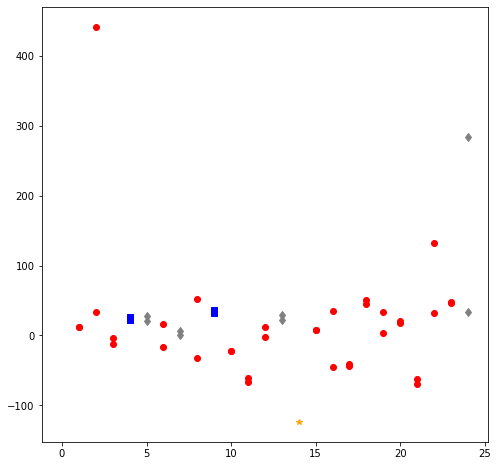

In [67]:
print('Problem 2:')
#visualize your results:
#plot the datasets using a different color for the different flags: 1= red, 2 = blue, 3 = gray, 4 = orange
# also use different symbols: 1 = circles, 2 = squares, 3 = diamonds, 4 = stars

#get edges of plot:
min_xy = np.min( [np.min( my_data ), np.min( my_control_data ) ] )
max_xy = np.max( [np.max( my_data ), np.max( my_control_data ) ] )

#set up the plot
plt.figure( figsize= (8,8) )

plt.plot( np.arange( 24 ), np.linspace( min_xy, max_xy, num = 24  )  , linestyle = 'none')

n = 0
#plot all i,j combinations:
for i in range( 4 ):
    for j in range( 6 ):
        n = n +1 # this wasn't in the for loop
        if data_control[ i, j ] == 1:
            plt.plot( n, my_data[ i,j ], color = 'red', marker = 'o' )
            plt.plot( n, my_control_data[ i,j ], color = 'red', marker = 'o' )
        if data_control[ i, j ] == 2:
            plt.plot( n, my_data[ i,j ], color = 'blue', marker = 's' )
            plt.plot( n, my_control_data[ i,j ], color = 'blue', marker = 's' )
        if data_control[ i, j ] == 3:
            plt.plot( n, my_data[ i,j ], color = 'gray', marker = 'd' )
            plt.plot( n, my_control_data[ i,j ], color = 'gray', marker = 'd' )
        if data_control[ i, j ] == 4:
            plt.plot( n, my_data[ i,j ], color = 'orange', marker = '*' )
            plt.plot( n, my_control_data[ i,j ] )

Problem 3
We want to build an electric circuit with N resistors. What will the 
properties of our circuit be if we connect them in series or in parallel?  Make a function 
my_circuit that takes as input 1) a string with information on whether your circuit is in 
series or parallel configuration, 2) the number of resistors, 3) a numpy array with their 
individual resistances and 4) the voltage (V) or amperage ( I ) of the circuit (depending 
on if it is parallel or series). The function should return information about the total 
resistance of the system and the total voltage (for series circuit) or amperage (for a 
parallel circuit).
Remember that for a series circuit the total resistance is Rtot = Σi ( Ri ) 
and for a parallel circuit 1/Rtot = Σi (1/Ri ). For a circuit in series I = const;  and in parallel 
V= const.   Also, from Ohm's law: R = V/ I . 
Call your function for a series circuit with 3 resistors with resistances of  5.0, 2.0 
and  7.0 Ω  and a current I = 10 A; and a parallel circuit with 3 resistors with resistances 
of 12.0, 5.0 and 20.0 Ω  and a voltage of 15V. 

In [68]:
def my_circuit(string,resistors,resistances,VI):
    if string == 'series' : #takes the string to know what kind of calculations to use
        Rtot = 0 # set initial value to be added to
        I = VI #current is constant in series, so the input was current
        for i in range(len(resistances)):
            Rtot = Rtot + resistances[i] #makes rtot the sum of all the resistances
        V = Rtot * I # calculates volts off of ohms law
    elif string == 'parallel' :
        V = VI # voltage is constant in series so the input was voltage
        invRtot = 0
        for i in range(len(resistances)):
            invRtot = invRtot + (1 / (resistances[i]))
        Rtot = 1 / invRtot # calculates r tot as the inverse of the sum of the inverses of all the resistances
        I = V / Rtot #calculates current based on ohms law
    return print('The total resistance of the circuit is ',Rtot,' ohms. The total voltage is ',V,' volts and the current is ',I,' amperes.')

In [69]:
print('Problem 3:')
my_circuit('series',3,np.array([5 , 2 , 7]),10)
my_circuit('parallel',3,np.array([12, 5, 20]),15)

Problem 3:
The total resistance of the circuit is  14  ohms. The total voltage is  140  volts and the current is  10  amperes.
The total resistance of the circuit is  3.0  ohms. The total voltage is  15  volts and the current is  5.0  amperes.


Problem 4
In this exercise we will create a small 
simulation of our Solar system. Create a dictionary that has as keys the name of all 
eight planets of our Solar system and as values their average distance to the Sun in AU 
(see also: https://www.jpl.nasa.gov/edu/pdfs/scaless_reference.pdf) .  
a)  (15 points)  Create a function period(a) that calculates the rotational period of 
a planet when its average orbital distance a  is known. The function should use 
Kepler’s 3rd law (see previous homework) and return the orbital period p of the 
planet. Call the function for all planets in your dictionary and print their orbital 
periods in days.  
Assume that all planets orbit in a circular orbit, with a radius equal to their 
average orbit at distance a. Use the parametric equations of the circle ( x = 
r*cosθ , y = r*sinθ ) and calculate the orbits of all 8 planets (i.e., calculate all 
combinations of (xi,yi) in the orbit of each planet i). Remember your angle θ 
needs to be in radians for Python.   Plot the orbits in a box with dimensions (-50, 
+50) both in x and y, and add the “Sun” at the center (0,0) of the Solar system. 
Your plot should look like this: 
 
Save the plot as a .png using the appropriate command in Python and the 
appropriate naming for the image.  
 
b)  (Bonus 10 points) Now let’s get our planets moving! Can you create a little 
“movie” that plots Mercury, Venus, Earth, Mars and Jupiter orbiting around the 
Sun during a Jupiter year? Use a marker point to indicate the location of each 
planet at t=0. You can start by assuming that all planets are aligned at y = 0 (see 
Fig 1 below). Then try plotting the location of every planet at 30degrees 
increments, taking into account their orbital period to show the relative motions of 
one planet to the other. E.g, the Earth will do one circle in 1 year, but Jupiter 
needs 12 years, so you expect your “Earth” to do more circles before “Jupiter” 
completes 1 circle. Save the N necessary plots as .png, where N is the number 
of plots you need for “Mars” to complete a full rotation around the “Sun”. 
 

Problem 4:
This planet orbits the sun in  88.8975465072012  days.
This planet orbits the sun in  222.99319451498963  days.
This planet orbits the sun in  365.0  days.
This planet orbits the sun in  684.0033777694376  days.
This planet orbits the sun in  4328.105913676328  days.
This planet orbits the sun in  10755.124114179249  days.
This planet orbits the sun in  30707.51746396963  days.
This planet orbits the sun in  60155.63684042086  days.


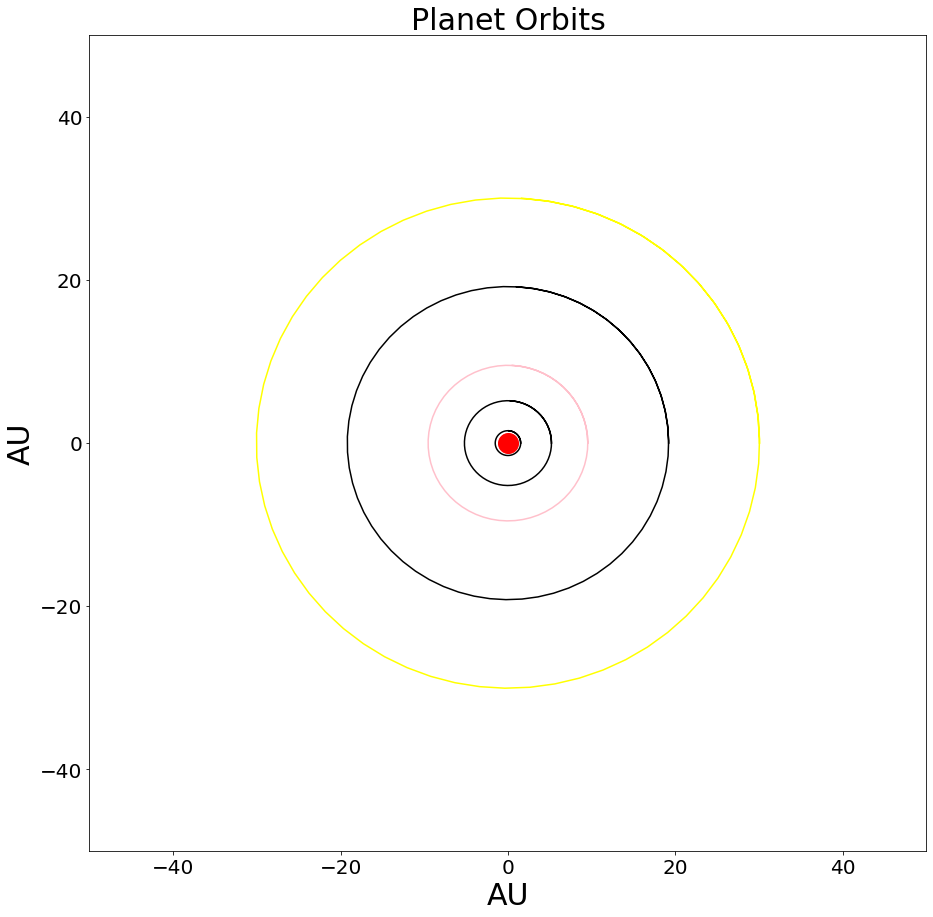

In [103]:
print('Problem 4:')
pdis = {
    "Mercury" : 0.39,
    "Venus" : 0.72,
    "Earth" : 1,
    "Mars" : 1.52,
    "Jupiter" : 5.2,
    "Saturn" : 9.54,
    "Uranus" : 19.2,
    "Neptune" : 30.06,
}

def period(a):
    p = ((a**3) * (365**2))**(1/2)
    return print('This planet orbits the sun in ',p,' days.')
for planet in pdis:
    period(pdis[planet])
    
theta = 2.5 *np.pi
plt.figure(figsize=(15,15))
for planet in pdis:
    if planet == "Neptune" :
        plt.plot((pdis[planet]*np.cos(np.arange(0,theta,0.1))),(pdis[planet]*np.sin(np.arange(0,theta,0.1))),color='yellow')
    elif planet == "Saturn" :
        plt.plot((pdis[planet]*np.cos(np.arange(0,theta,0.1))),(pdis[planet]*np.sin(np.arange(0,theta,0.1))),color='pink')
    else :
        plt.plot((pdis[planet]*np.cos(np.arange(0,theta,0.1))),(pdis[planet]*np.sin(np.arange(0,theta,0.1))),color='black')
plt.plot(0,0,marker='o',markersize=20,color='red')
plt.title('Planet Orbits',fontsize = 30)
plt.xlim( -50, 50 )
plt.ylim( -50, 50 )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('AU',fontsize = 30)
plt.ylabel('AU',fontsize = 30)
plt.savefig('hw_10_fig',format='png')